### Import the required libraries, methods and models 

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from matplotlib.colors import ListedColormap

### Reading the data set

In [26]:
# Importing the dataset
data= pd.read_csv("linearsep.csv")

# First ten rows of the dataset
data.head(n=10)

,X,Y,class
0,-0.177,0.93,1.0
1,1.980,1.77,0.0
2,1.800,1.70,0.0
3,-0.771,2.36,1.0
4,-0.308,1.59,1.0
5,0.615,2.43,1.0
6,1.090,2.22,0.0
7,-0.835,2.36,1.0
8,2.480,1.33,0.0
9,1.200,1.83,1.0


### Preparing the Data for Classification

In [27]:
# features variable are assigned to the 1st and 2nd coloumn (indexing starts from 0 in python)
x= data.iloc[:, [0,1]].values

# labels variable is assigned to the last coloumn
y= data.iloc[:, 2].values

In [28]:
#dividing the dataset into the test set and the train set.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [29]:
# Cheking the length of training and testing sets
print("Training Data Features and Outputs")
print(len(x_train))
print(len(y_train))

print("Testing Data Features and Outputs")
print((len(x_test)))
print(len(y_test))

Training Data Features and Outputs
75
75
Testing Data Features and Outputs
25
25


### Feature Scaling and modeling

In [30]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
# Fitting the training data to the KNN Model

# Loading the KNeighborsClassifier from sklearn to classifier 
classifier= KNeighborsClassifier(p=1)

#Fitting the model
classifier.fit(x_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=1,
                     weights='uniform')

### Prediction and metrics

In [32]:
# Predicting the Test Set Results
y_pred= classifier.predict(x_test)

print(y_pred)

[0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0.
 0.]


In [33]:
# Evaluating the KNN Algorithm with Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  1],
       [ 0, 11]])

In [34]:
# Accuracy of the Model

print("Accuracy Score \n {}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy Score 
 96.0%


In [35]:
print("Classification Report \n {}".format(classification_report(y_test, y_pred, labels=range(0,10))))

Classification Report 
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        11
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.96      0.96      0.96        25
   macro avg       0.19      0.19      0.19        25
weighted avg       0.96      0.96      0.96        25



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


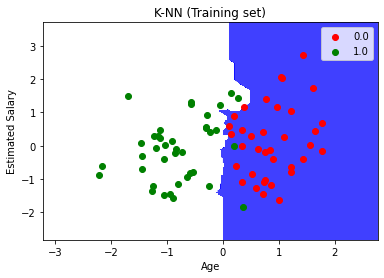

In [36]:
# Visualising the Train Set Results

from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
# Plotting the Graph

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


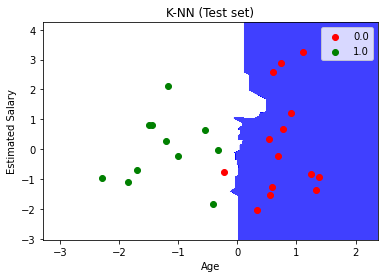

In [37]:
# Visualising the Test Set Results

from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'white')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
# Plotting the Graph
    
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()